In [1]:
from google.colab import files
uploaded = files.upload()

Saving Senal_lab_2 - 400.txt to Senal_lab_2 - 400.txt


Parte C

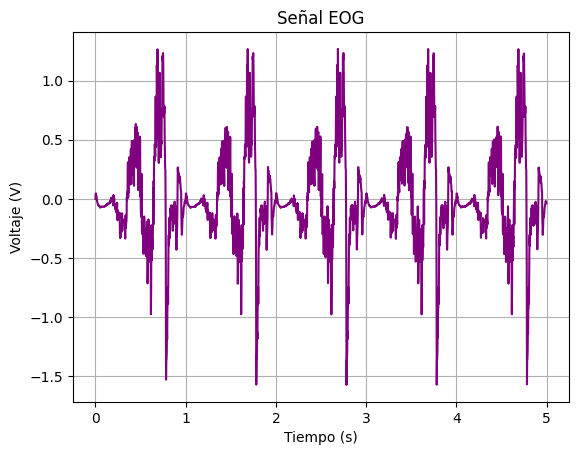

In [2]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt("Senal_lab_2 - 400.txt")
datos = datos.T

tiempo = datos[:, 0]
voltaje = datos[:, 1]

plt.plot(tiempo, voltaje, color="purple")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.title("Señal EOG")
plt.grid(True)
plt.show()

In [3]:

#media
media=np.mean(voltaje)
print (f"Media: {media} ")

#mediana
mediana=np.median(voltaje)
print (f"Mediana: {mediana} ")

#desviación estandar
desviacion_muestra=np.std(voltaje, ddof=1)
print (f"Desviacion estandar: {desviacion_muestra} ")

print(f"Máximo:", np.max(voltaje))
print(f"Mínimo:", np.min(voltaje))

print("Es una señal aleatoria, ya que depende de movimientos oculares y ruido fisiológico")
print("Es aperiódica, porque los movimientos oculares no ocurren en ciclos regulares.")
print("Aunque se digitaliza al muestrearla, se representa una señal originalmente análoga tomada con DAQ")


Media: 0.006078949378148536 
Mediana: -0.056089594567310996 
Desviacion estandar: 0.38893122360801474 
Máximo: 1.268323315802263
Mínimo: -1.5729922170285136
Es una señal aleatoria, ya que depende de movimientos oculares y ruido fisiológico
Es aperiódica, porque los movimientos oculares no ocurren en ciclos regulares.
Aunque se digitaliza al muestrearla, se representa una señal originalmente análoga tomada con DAQ


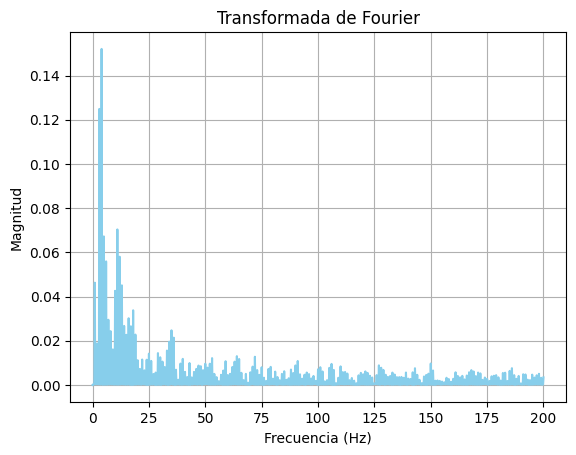

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#centra señal en cero
x = voltaje - np.mean(voltaje)
#numero de muestras y frecuencia de muestreo
N = len(x)
fs = 400

#funcion de transformada rapida de Fourier, rfft porque la señal es real y para devolver las frecuencias positivas
X = np.fft.rfft(x)
#vector de frecuencias para cada valor de la transformada, d=1/fs es el período de muestreo
f = np.fft.rfftfreq(N, d=1/fs)

#margnitud del espectro
mag = np.abs(X) / N

#grafica
plt.figure()
plt.plot(f, mag, color="skyblue")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Transformada de Fourier")
plt.grid(True)
plt.show()


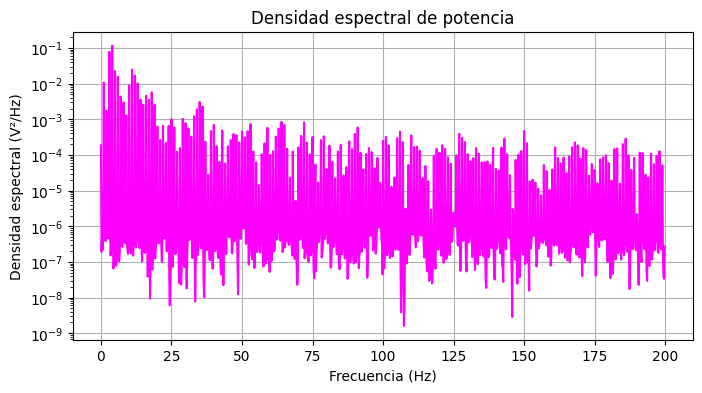

In [5]:
fs = 400
N = len(voltaje)

#calcula transformada rapida de Fourier completa (valores negativos y positivos)
fft_vals = np.fft.fft(voltaje)
#genera el vector de frecuencias
fft_freq = np.fft.fftfreq(N, 1/fs)

#solo mitad positiva del espectro
fft_vals = fft_vals[:N//2]
fft_freq = fft_freq[:N//2]

#densidad espectral de potencia
psd = (1/(fs*N)) * np.abs(fft_vals)**2

#grafica
plt.figure(figsize=(8,4))
plt.semilogy(fft_freq, psd, color="magenta")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral (V²/Hz)")
plt.title("Densidad espectral de potencia")
plt.grid()
plt.show()

In [6]:
#media
f_media = np.sum(f * mag) / np.sum(mag)
print(f"Frecuencia media: {f_media} Hz")

#mediana
mag_acumulativa = np.cumsum(mag)
total_mag = mag_acumulativa[-1]
f_mediana = f[np.searchsorted(mag_acumulativa, total_mag / 2)]
print(f"Frecuencia mediana: {f_mediana} Hz")

#desviacion estandar
f_std = np.sqrt(np.sum(mag * (f - f_media)**2) / np.sum(mag))
print(f"Desviación estándar: {f_std} Hz")


Frecuencia media: 57.50749177999556 Hz
Frecuencia mediana: 33.0 Hz
Desviación estándar: 58.97516355111772 Hz


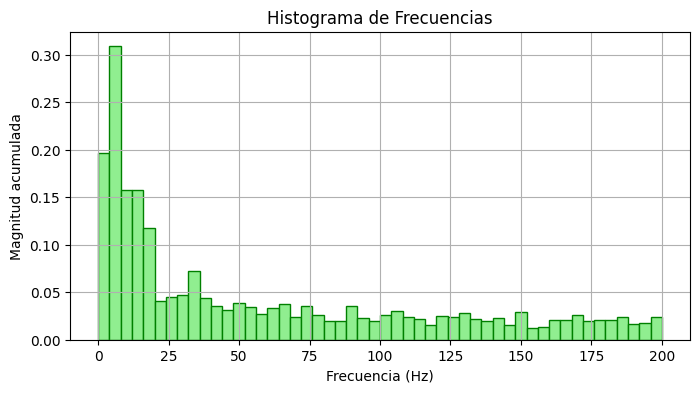

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(f, bins=50, weights=mag, color='lightgreen', edgecolor='green')
plt.title("Histograma de Frecuencias")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud acumulada")
plt.grid(True)
plt.show()
